# Preprocessing data

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [12]:
df_scale = pd.read_csv('df_scaled.csv')
df_scale.head()

,Average rating_scaled,Number of reviews_scaled,Publish year_scaled,Number of pages_scaled,Currently reading_scaled,MainGenre_Encoded
0,-0.836515,0.382224,0.435899,-0.671280,0.799825,42
1,1.064527,-0.461262,1.549410,-0.397062,0.505666,17
2,-0.575588,-0.601047,0.435899,-0.361295,-0.633889,60
3,1.772758,-0.581931,2.106165,-0.003620,-0.446023,17
4,1.811897,-0.589100,2.106165,-0.003620,-0.512764,17


In [13]:
df_original = pd.read_csv('results.csv')
df_original.head()

,Title,Author,Average rating,Number of ratings,Number of reviews,Genres,Publish year,Number of pages,Currently reading,Want to read
0,"The Law of Attraction (Lawyers in Love, #1)",N.M. Silber,3.76,11553,928.0,"Romance, Contemporary Romance, Contemporary, H...",2013.0,242.0,604.0,NaN
1,"Isle of Winds (The Changeling, #1)",James Fahy,4.27,1689,222.0,"Fantasy, Middle Grade, Young Adult, Fiction, M...",2015.0,265.0,485.0,NaN
2,Breaking Glass,Lisa Amowitz,3.83,504,105.0,"Young Adult, Mystery, Paranormal, Thriller, Fi...",2013.0,268.0,24.0,NaN
3,"Drowned Tomb (The Changeling, #2)",James Fahy,4.46,800,121.0,"Fantasy, Young Adult, Magic, Fiction",2016.0,NaN,100.0,NaN
4,"Chains of Gaia (The Changeling, #3)",James Fahy,4.59,695,115.0,"Fantasy, Young Adult, Fiction, Magic",2017.0,NaN,73.0,NaN


In [14]:
df_preprocessed = pd.concat([df_scale,df_original[['Average rating']]], axis=1)
df_preprocessed.head()

,Average rating_scaled,Number of reviews_scaled,Publish year_scaled,Number of pages_scaled,Currently reading_scaled,MainGenre_Encoded,Average rating
0,-0.836515,0.382224,0.435899,-0.671280,0.799825,42,3.76
1,1.064527,-0.461262,1.549410,-0.397062,0.505666,17,4.27
2,-0.575588,-0.601047,0.435899,-0.361295,-0.633889,60,3.83
3,1.772758,-0.581931,2.106165,-0.003620,-0.446023,17,4.46
4,1.811897,-0.589100,2.106165,-0.003620,-0.512764,17,4.59


In [15]:
# i want to convert df[verage rating] to catagorical data : <3.2 = low , 3.2-4.2 = medium, >4.2= high
def convert_rating(rating):
    if rating <3.2:
        return 'low'
    elif rating >= 3.2 and rating <=4.2:
        return 'medium'
    else:
        return 'high'

df_preprocessed['Average rating converted'] = df_preprocessed['Average rating'].apply(convert_rating)
df_preprocessed.head()

,Average rating_scaled,Number of reviews_scaled,Publish year_scaled,Number of pages_scaled,Currently reading_scaled,MainGenre_Encoded,Average rating,Average rating converted
0,-0.836515,0.382224,0.435899,-0.671280,0.799825,42,3.76,medium
1,1.064527,-0.461262,1.549410,-0.397062,0.505666,17,4.27,high
2,-0.575588,-0.601047,0.435899,-0.361295,-0.633889,60,3.83,medium
3,1.772758,-0.581931,2.106165,-0.003620,-0.446023,17,4.46,high
4,1.811897,-0.589100,2.106165,-0.003620,-0.512764,17,4.59,high


In [16]:
df_final = df_preprocessed.drop(columns=['Average rating'])
df_final.drop(columns=['Average rating_scaled'], inplace=True)

In [17]:
df_final.head()

,Number of reviews_scaled,Publish year_scaled,Number of pages_scaled,Currently reading_scaled,MainGenre_Encoded,Average rating converted
0,0.382224,0.435899,-0.671280,0.799825,42,medium
1,-0.461262,1.549410,-0.397062,0.505666,17,high
2,-0.601047,0.435899,-0.361295,-0.633889,60,medium
3,-0.581931,2.106165,-0.003620,-0.446023,17,high
4,-0.589100,2.106165,-0.003620,-0.512764,17,high


# Áp dụng KNN

In [18]:
# i want to spit df_final into x and y (x/y =8/2) with target is Average rating converted
from sklearn.model_selection import train_test_split
X = df_final.drop(columns=['Average rating converted'])
Y = df_final['Average rating converted']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train_real, x_val, y_train_real, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


k : 3, accuracy = 0.7954545454545454
k : 4, accuracy = 0.7424242424242424
k : 5, accuracy = 0.7878787878787878
k : 6, accuracy = 0.7954545454545454
k : 7, accuracy = 0.803030303030303
k : 8, accuracy = 0.7803030303030303
k : 9, accuracy = 0.7878787878787878
k : 10, accuracy = 0.7803030303030303
best k is 7 with accuracy = 0.803030303030303


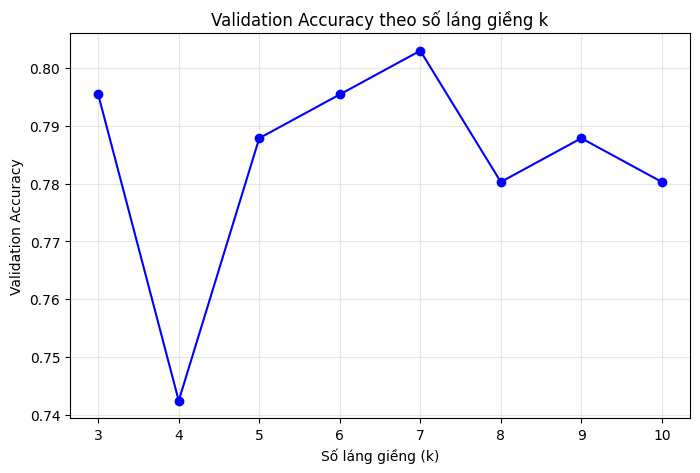

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
# trying to find the best k value
k_values = range(3,11)
k_best = 0
accuracy_best = 0
score =[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train_real, y_train_real)
    y_val_pred = knn.predict(x_val)
    accu = accuracy_score(y_val, y_val_pred)
    score.append(accu)
    print(f"k : {k}, accuracy = {accu}")
    if accu > accuracy_best:
        accuracy_best = accu
        k_best = k
print(f"best k is {k_best} with accuracy = {accuracy_best}")

# Vẽ biểu đồ accuracy theo k
plt.figure(figsize=(8, 5))
plt.plot(list(k_values), score, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy theo số láng giềng k")
plt.xlabel("Số láng giềng (k)")
plt.ylabel("Validation Accuracy")
plt.xticks(list(k_values))
plt.grid(True, alpha=0.3)
plt.show()


k : 3, accuracy = 0.7575757575757576
k : 4, accuracy = 0.7803030303030303
k : 5, accuracy = 0.7878787878787878
k : 6, accuracy = 0.8106060606060606
k : 7, accuracy = 0.8106060606060606
k : 8, accuracy = 0.803030303030303
k : 9, accuracy = 0.8181818181818182
k : 10, accuracy = 0.7954545454545454
best k is 9 with accuracy = 0.8181818181818182


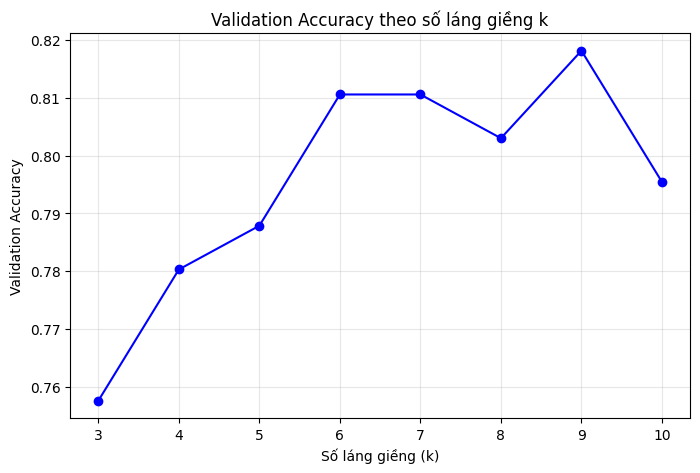

In [ ]:

k_best_distant = 0
accuracy_best_distant = 0
score_distant =[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors= k, weights='distance')
    knn.fit(x_train_real, y_train_real)
    y_val_pred_distant = knn.predict(x_val)
    accu = accuracy_score(y_val, y_val_pred_distant)
    score_distant.append(accu)
    print(f"k : {k}, accuracy = {accu}")
    if accu > accuracy_best_distant:
        accuracy_best_distant = accu
        k_best_distant = k
print(f"best k distant is {k_best_distant} with accuracy = {accuracy_best_distant}")

# Vẽ biểu đồ accuracy theo k
plt.figure(figsize=(8, 5))
plt.plot(list(k_values), score_distant, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy theo số láng giềng k")
plt.xlabel("Số láng giềng (k)")
plt.ylabel("Validation Accuracy")
plt.xticks(list(k_values))
plt.grid(True, alpha=0.3)
plt.show()

## Đánh giá không dùng trọng số

In [21]:
knn_final = KNeighborsClassifier(n_neighbors= k_best)
knn_final.fit(x_train, y_train)
y_test_pred = knn_final.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {pre_score}")
print(f"Test Recall: {recall}")
print(f"Test F1 Score: {f1}")

Test Accuracy: 0.7682926829268293
Test Precision: 0.7262270250075128
Test Recall: 0.7682926829268293
Test F1 Score: 0.7368961107278643


d:\CrawlBook\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## Đánh giá dùng trọng số

In [25]:
print(f"Using k = {k_best_distant} with weights = 'distance'")
knn_final_distant = KNeighborsClassifier(n_neighbors= k_best_distant, weights='distance')
knn_final_distant.fit(x_train, y_train)
y_test_pred_distant = knn_final.predict(x_test)
accuracy_distant = accuracy_score(y_test, y_test_pred_distant)
pre_score_distant = precision_score(y_test, y_test_pred_distant, average='weighted')
f1_distant = f1_score(y_test, y_test_pred_distant, average='weighted')
recall_distant = recall_score(y_test, y_test_pred_distant, average='weighted')
print(f"Test Accuracy: {accuracy_distant}")
print(f"Test Precision: {pre_score_distant}")
print(f"Test Recall: {recall_distant}")
print(f"Test F1 Score: {f1_distant}")

Using k = 9 with weights = 'distance'
Test Accuracy: 0.7682926829268293
Test Precision: 0.7262270250075128
Test Recall: 0.7682926829268293
Test F1 Score: 0.7368961107278643


d:\CrawlBook\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
